In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df=pd.read_csv("Super Market Sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [21]:
str_data=df.select_dtypes(include=["object"]).iloc[:,1:]
str_data

,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [47]:
Total_orders=df.shape[0]
for i in str_data:
    print()
    print(str_data[i].value_counts()/Total_orders*100)
    print()


A    34.0
B    33.2
C    32.8
Name: Branch, dtype: float64

Yangon       34.0
Mandalay     33.2
Naypyitaw    32.8
Name: City, dtype: float64

Member    50.1
Normal    49.9
Name: Customer type, dtype: float64

Female    50.1
Male      49.9
Name: Gender, dtype: float64

Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: Product line, dtype: float64

2/7/2019     2.0
2/15/2019    1.9
3/2/2019     1.8
1/8/2019     1.8
3/14/2019    1.8
            ... 
2/1/2019     0.6
3/21/2019    0.6
1/4/2019     0.6
3/17/2019    0.6
2/21/2019    0.6
Name: Date, Length: 89, dtype: float64

19:48    0.7
14:42    0.7
17:38    0.6
10:11    0.5
11:40    0.5
        ... 
12:31    0.1
16:58    0.1
16:55    0.1
13:10    0.1
16:50    0.1
Name: Time, Length: 506, dtype: float64

Ewallet        34.5
Cash           34.4
Credit card    31.1
Name: Payment, dtype: float64


In [56]:
df[['Quantity', 'Total', 'cogs',
        'gross income']].sum().round()

Quantity          5510.0
Total           322967.0
cogs            307587.0
gross income     15379.0
dtype: float64

In [59]:
branch_revenue = df.groupby("Branch")["Total"].sum()
branch_revenue

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

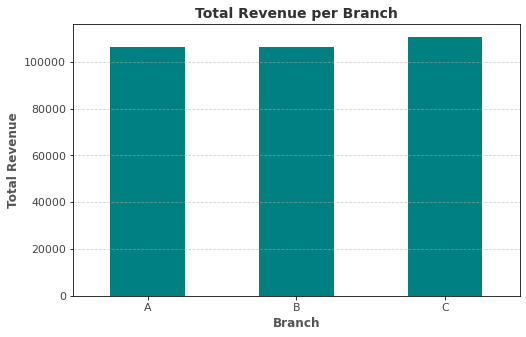

In [57]:
# Group by branch and sum the total revenue
branch_revenue = df.groupby("Branch")["Total"].sum()

# Plot the revenue per branch
plt.figure(figsize=(8, 5))
branch_revenue.plot(kind="bar", color="#008080")  # Teal color
plt.title("Total Revenue  per Branch", fontsize=14, fontweight="bold", color="#333333")
plt.xlabel("Branch", fontsize=12, fontweight="bold", color="#555555")
plt.ylabel("Total Revenue", fontsize=12, fontweight="bold", color="#555555")
plt.xticks(rotation=0, fontsize=11, color="#444444")
plt.yticks(fontsize=11, color="#444444")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.savefig('Total Revenue per Branche.png', bbox_inches='tight', dpi=300)  # Save as PNG
plt.show()
plt.close()


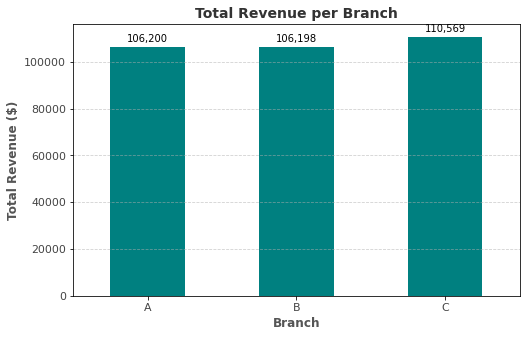

In [97]:
branch_revenue = df.groupby("Branch")["Total"].sum()

plt.figure(figsize=(8, 5))
ax = branch_revenue.plot(kind="bar", color="#008080")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), textcoords='offset points', 
                ha='center', fontsize=10, color='black')

plt.title("Total Revenue per Branch", fontsize=14, fontweight="bold", color="#333333")
plt.xlabel("Branch", fontsize=12, fontweight="bold", color="#555555")
plt.ylabel("Total Revenue ($)", fontsize=12, fontweight="bold", color="#555555")
plt.xticks(rotation=0, fontsize=11, color="#444444")
plt.yticks(fontsize=11, color="#444444")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [66]:
branch_quantity = (df.groupby("Branch")["Quantity"].sum()/df["Quantity"].sum()).sort_values(ascending=False)
branch_quantity

Branch
A    0.337387
C    0.332305
B    0.330309
Name: Quantity, dtype: float64

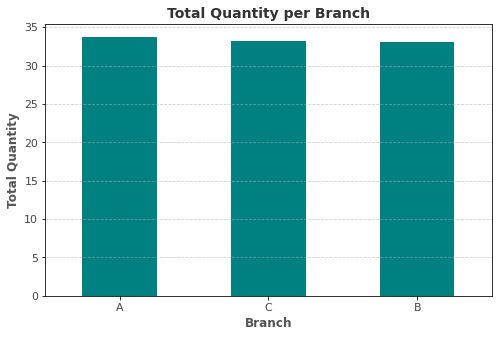

In [67]:
 #Group by branch and sum the total revenue
branch_quantity = (df.groupby("Branch")["Quantity"].sum()/df["Quantity"].sum()).sort_values(ascending=False)*100

# Plot the revenue per branch
plt.figure(figsize=(8, 5))
branch_quantity.plot(kind="bar", color="#008080")  # Teal color
plt.title("Total Quantity per Branch", fontsize=14, fontweight="bold", color="#333333")
plt.xlabel("Branch", fontsize=12, fontweight="bold", color="#555555")
plt.ylabel("Total Quantity", fontsize=12, fontweight="bold", color="#555555")
plt.xticks(rotation=0, fontsize=11, color="#444444")
plt.yticks(fontsize=11, color="#444444")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.savefig('Total Quantity per Branche.png', bbox_inches='tight', dpi=300)  # Save as PNG
plt.show()
plt.close()


In [68]:
branch_orders = (df.groupby("Branch")["Quantity"].count()/df["Quantity"].count()).sort_values(ascending=False)
branch_orders

Branch
A    0.340
B    0.332
C    0.328
Name: Quantity, dtype: float64

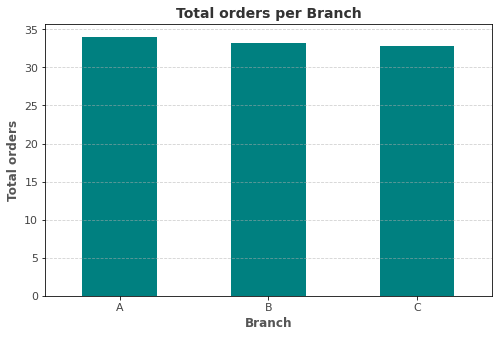

In [65]:
 #Group by branch and sum the total revenue
branch_orders = (df.groupby("Branch")["Quantity"].count()/df["Quantity"].count()).sort_values(ascending=False)*100

# Plot the revenue per branch
plt.figure(figsize=(8, 5))
branch_orders.plot(kind="bar", color="#008080")  # Teal color
plt.title("Total orders per Branch", fontsize=14, fontweight="bold", color="#333333")
plt.xlabel("Branch", fontsize=12, fontweight="bold", color="#555555")
plt.ylabel("Total orders", fontsize=12, fontweight="bold", color="#555555")
plt.xticks(rotation=0, fontsize=11, color="#444444")
plt.yticks(fontsize=11, color="#444444")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.savefig('Total orders per Branche.png', bbox_inches='tight', dpi=300)  # Save as PNG
plt.show()
plt.close()

In [71]:
branch_avg_revenue = df.groupby("Branch")["Total"].mean()
branch_avg_quantity = df.groupby("Branch")["Quantity"].mean()

print(branch_avg_revenue)
print(branch_avg_quantity)

Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64
Branch
A    5.467647
B    5.481928
C    5.582317
Name: Quantity, dtype: float64


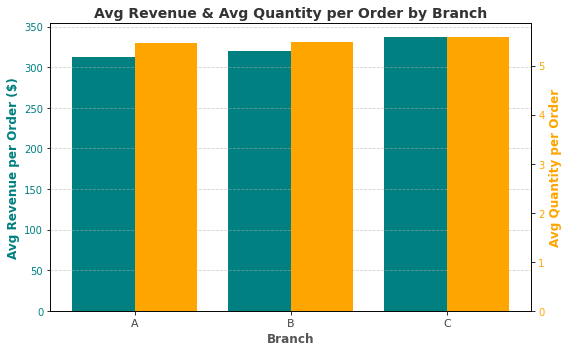

In [72]:
# Group by branch and calculate average revenue per order and average quantity per order
branch_avg_revenue = df.groupby("Branch")["Total"].mean()
branch_avg_quantity = df.groupby("Branch")["Quantity"].mean()

# Define bar width
bar_width = 0.4
branches = branch_avg_revenue.index
x = np.arange(len(branches))  # X-axis positions

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Average Revenue per Order (Left Y-axis)
ax1.bar(x - bar_width/2, branch_avg_revenue, width=bar_width, color="#008080", label="Avg Revenue per Order ($)")  # Teal
ax1.set_ylabel("Avg Revenue per Order ($)", fontsize=12, fontweight="bold", color="#008080")
ax1.tick_params(axis="y", labelcolor="#008080")

# Create second y-axis for Avg Quantity per Order
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, branch_avg_quantity, width=bar_width, color="#FFA500", label="Avg Quantity per Order")  # Orange
ax2.set_ylabel("Avg Quantity per Order", fontsize=12, fontweight="bold", color="#FFA500")
ax2.tick_params(axis="y", labelcolor="#FFA500")

# Titles and labels
ax1.set_title("Avg Revenue & Avg Quantity per Order by Branch", fontsize=14, fontweight="bold", color="#333333")
ax1.set_xlabel("Branch", fontsize=12, fontweight="bold", color="#555555")
ax1.set_xticks(x)
ax1.set_xticklabels(branches, fontsize=11, color="#444444")

# Grid and layout adjustments
ax1.grid(axis="y", linestyle="--", alpha=0.6)
fig.tight_layout()

# Show the plot
plt.savefig('average revenue per order and average quantity per order.png', bbox_inches='tight', dpi=300)  # Save as PNG
plt.show()
plt.close()

product analysis

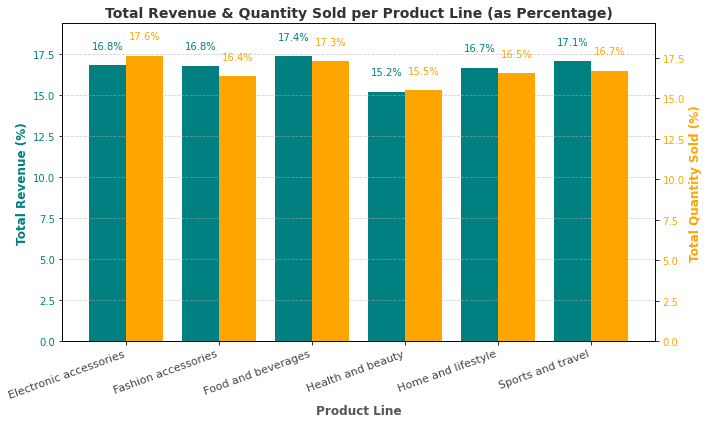

In [73]:
# Group by product line and calculate total revenue and total quantity
product_revenue = df.groupby("Product line")["Total"].sum()
product_quantity = df.groupby("Product line")["Quantity"].sum()

# Calculate total revenue and total quantity for percentage calculation
total_revenue = product_revenue.sum()
total_quantity = product_quantity.sum()

# Convert revenue and quantity to percentages
product_revenue_percent = (product_revenue / total_revenue) * 100
product_quantity_percent = (product_quantity / total_quantity) * 100

# Define bar width
bar_width = 0.4
product_lines = product_revenue.index
x = np.arange(len(product_lines))  # X-axis positions

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Revenue Percentage (Left Y-axis)
bars_revenue = ax1.bar(x - bar_width/2, product_revenue_percent, width=bar_width, color="#008080", label="Total Revenue (%)")  # Teal
ax1.set_ylabel("Total Revenue (%)", fontsize=12, fontweight="bold", color="#008080")
ax1.tick_params(axis="y", labelcolor="#008080")

# Add notations for Total Revenue
for i, bar in enumerate(bars_revenue):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height+1 , f'{height:.1f}%', ha='center', fontsize=10, color="#008080")

# Create second y-axis for Total Quantity Percentage
ax2 = ax1.twinx()
bars_quantity = ax2.bar(x + bar_width/2, product_quantity_percent, width=bar_width, color="#FFA500", label="Total Quantity Sold (%)")  # Orange
ax2.set_ylabel("Total Quantity Sold (%)", fontsize=12, fontweight="bold", color="#FFA500")
ax2.tick_params(axis="y", labelcolor="#FFA500")

# Add notations for Total Quantity Sold
for i, bar in enumerate(bars_quantity):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontsize=10, color="#FFA500")

# Titles and labels
ax1.set_title("Total Revenue & Quantity Sold per Product Line (as Percentage)", fontsize=14, fontweight="bold", color="#333333")
ax1.set_xlabel("Product Line", fontsize=12, fontweight="bold", color="#555555")
ax1.set_xticks(x)
ax1.set_xticklabels(product_lines, fontsize=11, color="#444444", rotation=20, ha="right")



ax1.set_ylim(0, max(product_revenue_percent) + 2)  # Add space above the highest bar
ax2.set_ylim(0, max(product_quantity_percent) + 2)  # Add space above the highest bar
# Grid and layout adjustments
ax1.grid(axis="y", linestyle="--", alpha=0.6)
fig.tight_layout()

# Show the plot
plt.savefig('product line and calculate total revenue and total quantity.png', bbox_inches='tight', dpi=300)  # Save as PNG
plt.show()
plt.close()

In [77]:
# Convert Date column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional features like Year, Month, Day, Day of the week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Month Name'] = df['Date'].dt.month_name()
df['Weekday'] = df['Date'].dt.weekday  # 0=Monday, 1=Tuesday, etc.
# df['Hour'] = df['Date'].dt.hour
df['Month-Year'] = df['Date'].dt.strftime('%m-%Y')

In [78]:
df.groupby('Month-Year')['Total'].sum()/df["Total"].sum()*100

Month-Year
01-2019    36.007381
02-2019    30.101976
03-2019    33.890643
Name: Total, dtype: float64

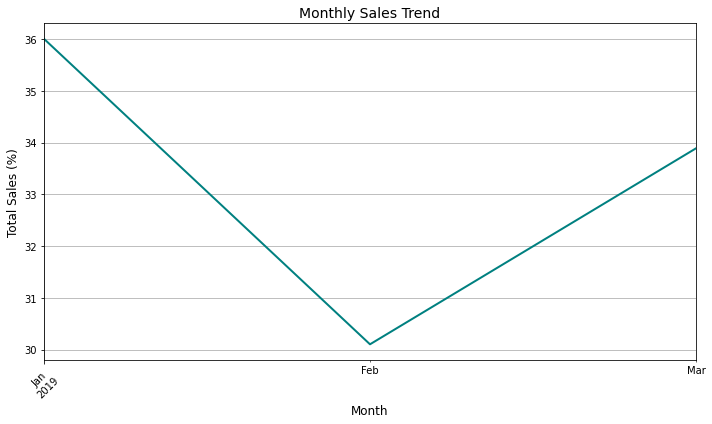

In [79]:
# Group by Month-Year and sum the total sales
df['Month-Year'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Total'].sum()/df["Total"].sum()*100

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='teal', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (%)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.savefig('monthly sales.png', bbox_inches='tight', dpi=300)  # Save as PNG
plt.show()
plt.close()

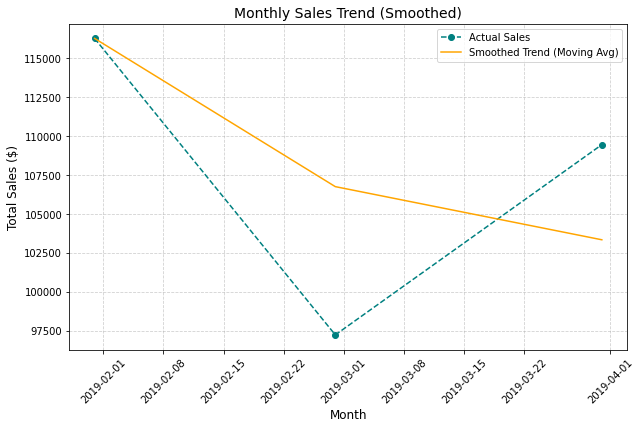

In [94]:
monthly_sales = df.resample("M", on="Date")["Total"].sum()
monthly_sales_smoothed = monthly_sales.rolling(window=2, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label="Actual Sales", linestyle="--", marker="o", color="teal")
plt.plot(monthly_sales_smoothed.index, monthly_sales_smoothed, label="Smoothed Trend (Moving Avg)", color="orange")

plt.title("Monthly Sales Trend (Smoothed)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)

plt.show()

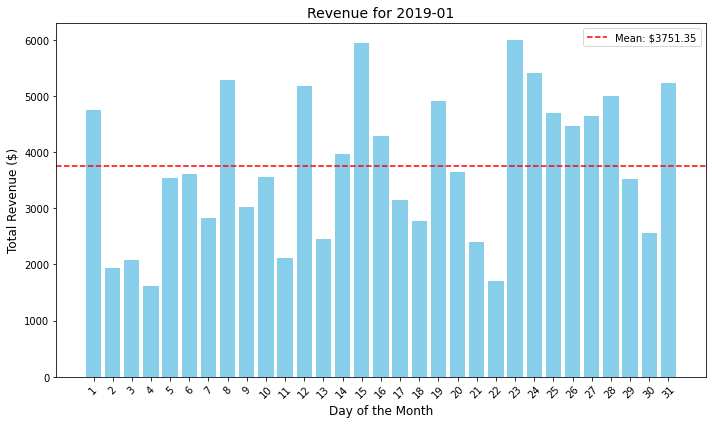

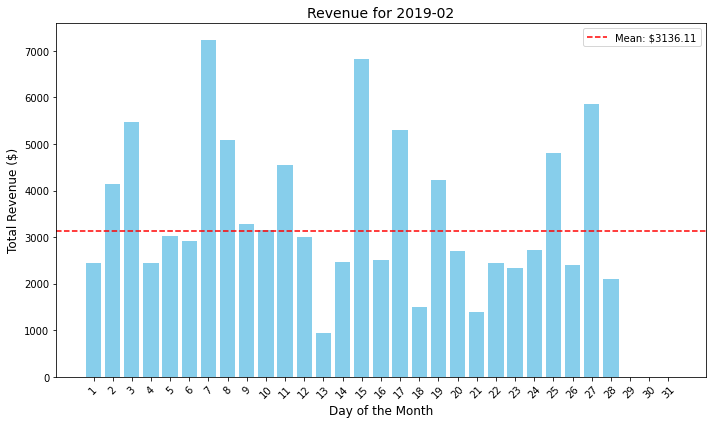

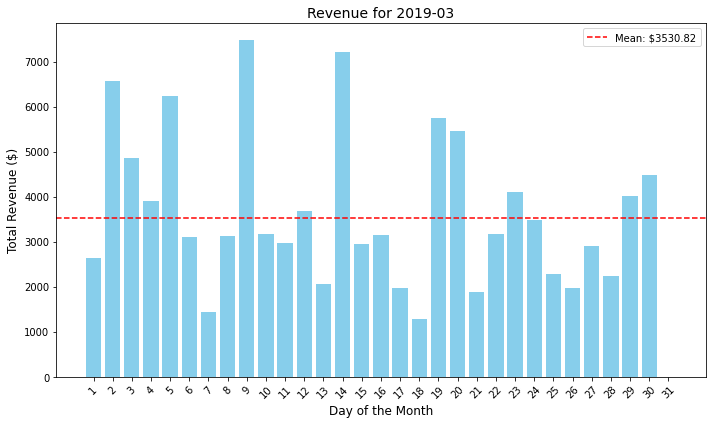

In [80]:
# Group by Month and Day to get total revenue for each day of the month
df['Month-Day'] = df['Date'].dt.to_period('M').astype(str)  # Month-Year as a string for grouping
df['Day'] = df['Date'].dt.day
daily_revenue_per_month = df.groupby(['Month-Day', 'Day'])['Total'].sum().unstack(fill_value=0)

# Get the months (Month-Year) for subplot titles
months = daily_revenue_per_month.index

# Iterate through each month and save each plot separately
for month in months:
    # Create a new figure for each month
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the daily revenue for the current month
    ax.bar(daily_revenue_per_month.columns, daily_revenue_per_month.loc[month], color='skyblue')

    # Calculate the mean for the month
    mean_revenue = daily_revenue_per_month.loc[month].mean()
    
    # Plot the mean line
    ax.axhline(mean_revenue, color='red', linestyle='--', label=f'Mean: ${mean_revenue:.2f}')
    
    ax.set_title(f"Revenue for {month}", fontsize=14)
    ax.set_xlabel("Day of the Month", fontsize=12)
    ax.set_ylabel("Total Revenue ($)", fontsize=12)
    ax.set_xticks(range(1, 32))  # Set ticks for 31 days (adjust if fewer days in the month)
    ax.set_xticklabels(range(1, 32), rotation=45)
    
    # Add a legend to show the mean line label
    ax.legend()

    # Save the plot for this specific month
    fig.tight_layout()
    fig.savefig(f"Revenue_for_{month}.png", bbox_inches='tight', dpi=400)
    
    plt.show()

    # Close the figure to save memory (not necessary, but a good practice when creating many plots)
    plt.close(fig)

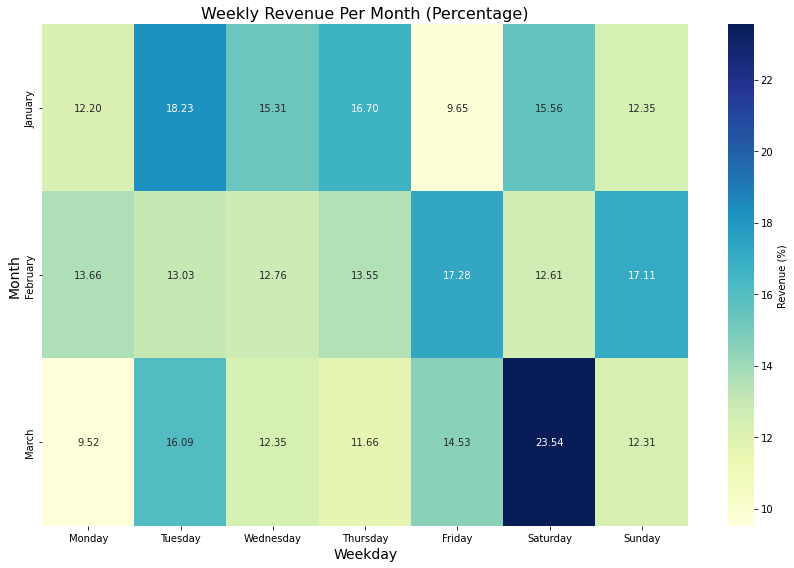

In [82]:
# Add a column for month names
df['Month_Name'] = df['Date'].dt.strftime('%B')  # Convert numeric month to full name (e.g., "January")

# Order months from January to December
month_order = [
    'January', 'February', 'March']#, 'April', 'May', 'June', 
#    'July', 'August', 'September', 'October', 'November', 'December'
# ]

df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

# Create a list for ordered weekdays
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by Month and Week to get total revenue for each week in the month
weekly_revenue_per_month = df.groupby(['Month_Name', 'Weekday'])['Total'].sum().unstack(fill_value=0)

# Normalize the revenue to show as percentage of the total revenue for each month
monthly_total_revenue = df.groupby('Month_Name')['Total'].sum()
weekly_revenue_percentage = weekly_revenue_per_month.divide(monthly_total_revenue, axis=0) * 100  # Multiply by 100 to get percentage

# Create a heatmap
plt.figure(figsize=(12, 8))

# Plot the heatmap
sb.heatmap(weekly_revenue_percentage, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Revenue (%)'}, 
           xticklabels=weekdays_order, yticklabels=month_order)

# Adding title and labels
plt.title('Weekly Revenue Per Month (Percentage)', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Month', fontsize=14)

# Display the plot
plt.tight_layout()
plt.savefig('Weekly Revenue Per Month.png', bbox_inches='tight', dpi=400)  # Save as PNG
plt.show()
plt.close()

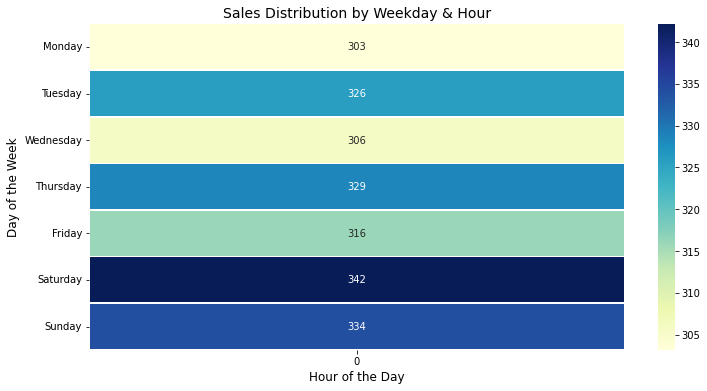

In [109]:
df["Hour"]=df["Date"].dt.hour
sales_heatmap = df.pivot_table(index="Weekday", columns="Hour", values="Total", aggfunc="mean")

# Reorder the weekdays to start from Monday
ordered_weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_heatmap = sales_heatmap.reindex(ordered_weekdays)

plt.figure(figsize=(12, 6))
sb.heatmap(sales_heatmap, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Sales Distribution by Weekday & Hour", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()

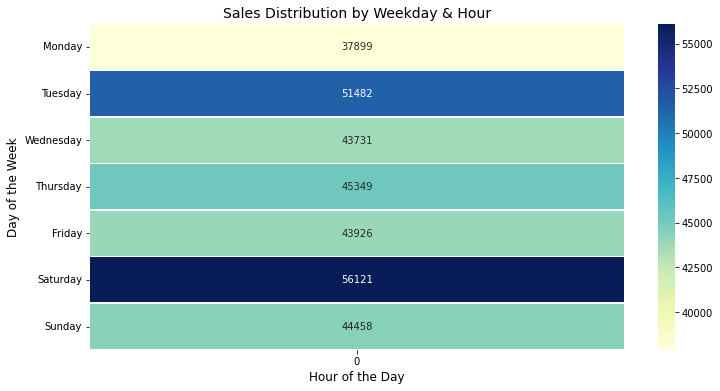

In [110]:
# Assuming 'df' is already defined, and it has a 'Date' column in datetime format
df["Hour"] = df["Date"].dt.hour
df["Weekday"] = df["Date"].dt.day_name()  # Get the full name of the day (e.g., "Monday", "Tuesday")

# Create the pivot table
sales_heatmap = df.pivot_table(index="Weekday", columns="Hour", values="Total", aggfunc="sum")

# Reorder the weekdays to start from Monday
ordered_weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_heatmap = sales_heatmap.reindex(ordered_weekdays)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sb.heatmap(sales_heatmap, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Sales Distribution by Weekday & Hour", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()

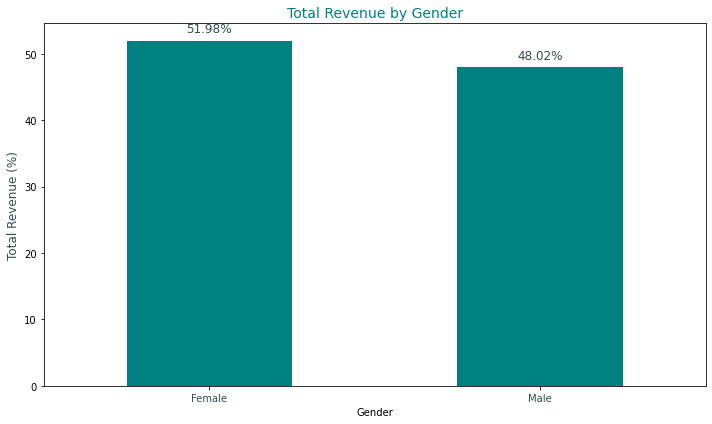

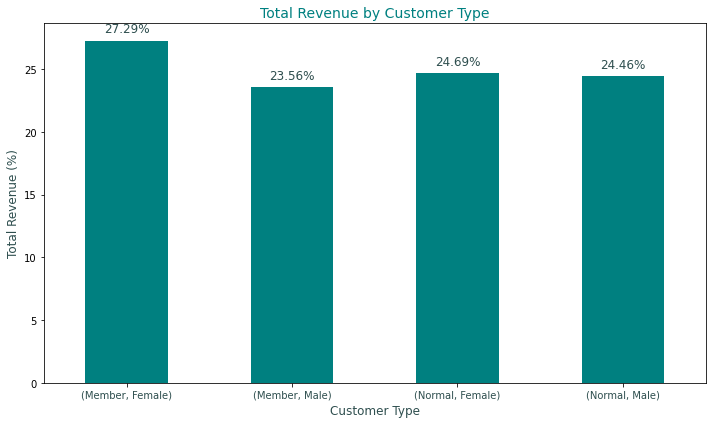

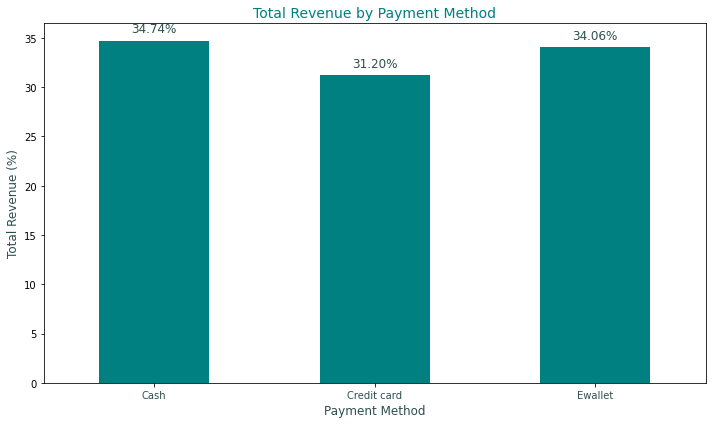

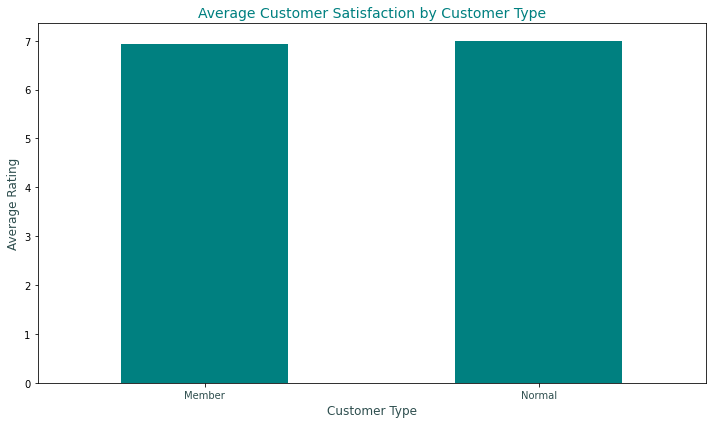

In [111]:
# Grouping by Gender to calculate total revenue as percentage
revenue_by_gender = df.groupby('Gender')['Total'].sum() / df["Total"].sum() * 100

# Plotting the total revenue for each gender with compatible colors
ax = revenue_by_gender.plot(kind='bar', color=['#008080'], figsize=(10, 6), legend=False)

# Add annotations on top of the bars (show percentages)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', 
                fontsize=12, color='#2F4F4F')

# Adding title and labels
plt.title('Total Revenue by Gender', fontsize=14, color='#008080')
plt.ylabel('Total Revenue (%)', fontsize=12, color='#2F4F4F')

# Set the color of the x-axis labels
plt.xticks(rotation=0, color='#2F4F4F')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.savefig('revenue_by_gender.png', bbox_inches='tight', dpi=400)  # Save as PNG
plt.show()
plt.close()

# Grouping by Customer Type to calculate total revenue as percentage
revenue_by_customer_type = df.groupby(['Customer type',"Gender"])['Total'].sum() / df["Total"].sum() * 100

# Plotting the total revenue for each customer type with compatible colors
ax = revenue_by_customer_type.plot(kind='bar', color=['#008080'], figsize=(10, 6), legend=False)

# Add annotations on top of the bars (show percentages)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', 
                fontsize=12, color='#2F4F4F')

# Adding title and labels
plt.title('Total Revenue by Customer Type', fontsize=14, color='#008080')
plt.xlabel('Customer Type', fontsize=12, color='#2F4F4F')
plt.ylabel('Total Revenue (%)', fontsize=12, color='#2F4F4F')

# Set the color of the x-axis labels
plt.xticks(rotation=0, color='#2F4F4F')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.savefig('revenue_by_customer_type_and_gender.png', bbox_inches='tight', dpi=400)  # Save as PNG
plt.show()
plt.close()

# Grouping by Payment method to calculate total revenue as percentage
revenue_by_payment = df.groupby('Payment')['Total'].sum() / df["Total"].sum() * 100

# Plotting the total revenue for each payment method with compatible colors
ax = revenue_by_payment.plot(kind='bar', color=['#008080'], figsize=(10, 6), legend=False)

# Add annotations on top of the bars (show percentages)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', 
                fontsize=12, color='#2F4F4F')

# Adding title and labels
plt.title('Total Revenue by Payment Method', fontsize=14, color='#008080')
plt.xlabel('Payment Method', fontsize=12, color='#2F4F4F')
plt.ylabel('Total Revenue (%)', fontsize=12, color='#2F4F4F')

# Set the color of the x-axis labels
plt.xticks(rotation=0, color='#2F4F4F')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.savefig('revenue_by_payment.png', bbox_inches='tight', dpi=400)  # Save as PNG
plt.show()
plt.close()

# Group by Customer Type and calculate average rating
avg_rating_by_customer_type = df.groupby('Customer type')['Rating'].mean()

# Plot the average rating by customer type
avg_rating_by_customer_type.plot(kind='bar', color='#008080', figsize=(10, 6))
plt.title('Average Customer Satisfaction by Customer Type', fontsize=14, color='#008080')
plt.xlabel('Customer Type', fontsize=12, color='#2F4F4F')
plt.ylabel('Average Rating', fontsize=12, color='#2F4F4F')
plt.xticks(rotation=0, color='#2F4F4F')
plt.tight_layout()
plt.show()




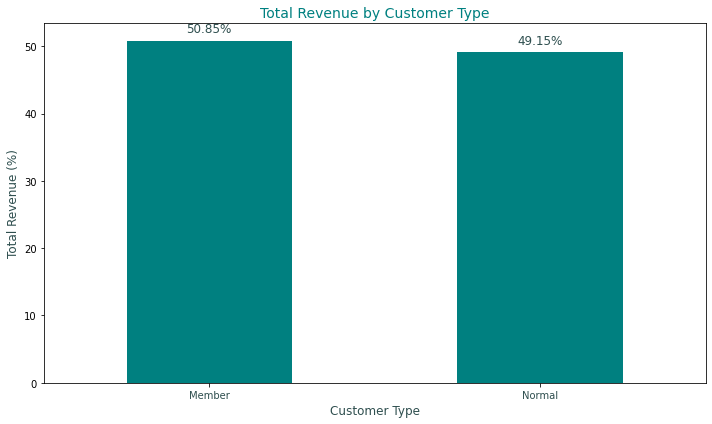

In [83]:
# Grouping by Customer Type to calculate total revenue as percentage
revenue_by_customer_type = df.groupby('Customer type')['Total'].sum() / df["Total"].sum() * 100

# Plotting the total revenue for each customer type with compatible colors
ax = revenue_by_customer_type.plot(kind='bar', color=['#008080'], figsize=(10, 6), legend=False)

# Add annotations on top of the bars (show percentages)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', 
                fontsize=12, color='#2F4F4F')

# Adding title and labels
plt.title('Total Revenue by Customer Type', fontsize=14, color='#008080')
plt.xlabel('Customer Type', fontsize=12, color='#2F4F4F')
plt.ylabel('Total Revenue (%)', fontsize=12, color='#2F4F4F')

# Set the color of the x-axis labels
plt.xticks(rotation=0, color='#2F4F4F')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.savefig('revenue_by_customer_type.png', bbox_inches='tight', dpi=400)  # Save as PNG
plt.show()
plt.close()

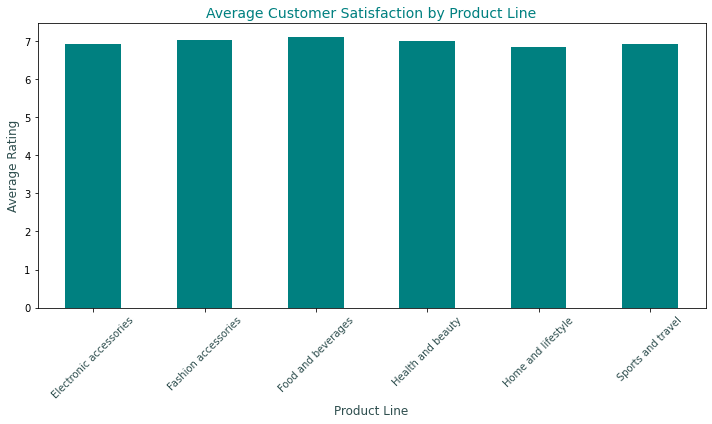

In [88]:
# Group by Product Line and calculate average satisfaction (Rating)
avg_rating_by_product = df.groupby('Product line')['Rating'].mean()

# Plot the average rating by product line
ax = avg_rating_by_product.plot(kind='bar', color='#008080', figsize=(10, 6))
plt.title('Average Customer Satisfaction by Product Line', fontsize=14, color='#008080')
plt.xlabel('Product Line', fontsize=12, color='#2F4F4F')
plt.ylabel('Average Rating', fontsize=12, color='#2F4F4F')
plt.xticks(rotation=45, color='#2F4F4F')

# Save the plot as an image
plt.tight_layout()
plt.savefig('Customer_Satisfaction_by_Product_Line.png', dpi=400)

# Show the plot
plt.show()


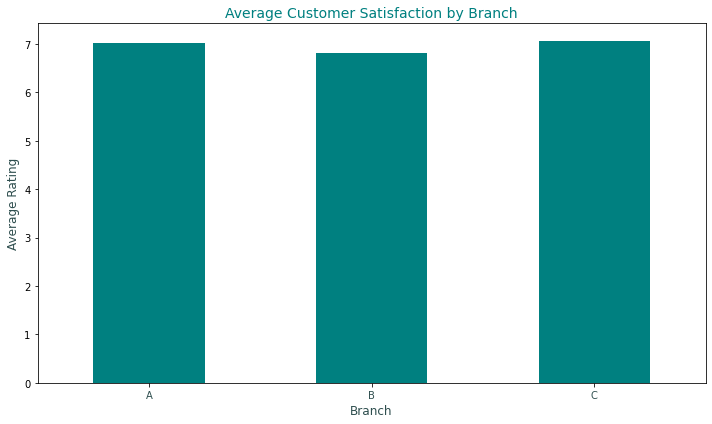

In [89]:
# Group by Branch and calculate average satisfaction (Rating)
avg_rating_by_branch = df.groupby('Branch')['Rating'].mean()

# Plot the average rating by branch
ax = avg_rating_by_branch.plot(kind='bar', color='#008080', figsize=(10, 6))
plt.title('Average Customer Satisfaction by Branch', fontsize=14, color='#008080')
plt.xlabel('Branch', fontsize=12, color='#2F4F4F')
plt.ylabel('Average Rating', fontsize=12, color='#2F4F4F')
plt.xticks(rotation=0, color='#2F4F4F')

# Save the plot as an image
plt.tight_layout()
plt.savefig('Customer_Satisfaction_by_Branch.png', dpi=400)

# Show the plot
plt.show()


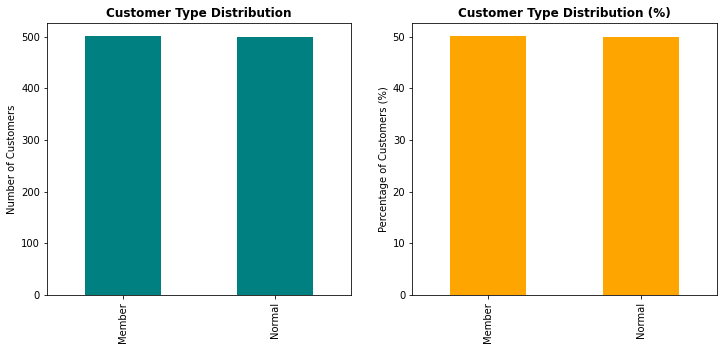

In [95]:
customer_type_counts = df["Customer type"].value_counts()
customer_type_percent = customer_type_counts / customer_type_counts.sum() * 100

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Absolute values
customer_type_counts.plot(kind="bar", ax=ax[0], color="#008080")
ax[0].set_title("Customer Type Distribution", fontsize=12, fontweight="bold")
ax[0].set_ylabel("Number of Customers")

# Percentage values
customer_type_percent.plot(kind="bar", ax=ax[1], color="#FFA500")
ax[1].set_title("Customer Type Distribution (%)", fontsize=12, fontweight="bold")
ax[1].set_ylabel("Percentage of Customers (%)")

plt.show()